In [14]:
from pricing_methods.bjerksund_stensland import *

In [ ]:
bs_model = BjerksundStensland(
    S=100,
    K=100,
    T=.25,
    r=0.08,
    b=0.04,
    sigma=0.2
)

# Calculate prices
call_price = bs_model.calculate_call_price()
put_price = bs_model.calculate_put_price()

print(f"American Call Option Price: {call_price:.4f}")
print(f"American Put Option Price: {put_price:.4f}")

NameError: name 'BjerksundStensland' is not defined

Jakieś przykladowe wykresy

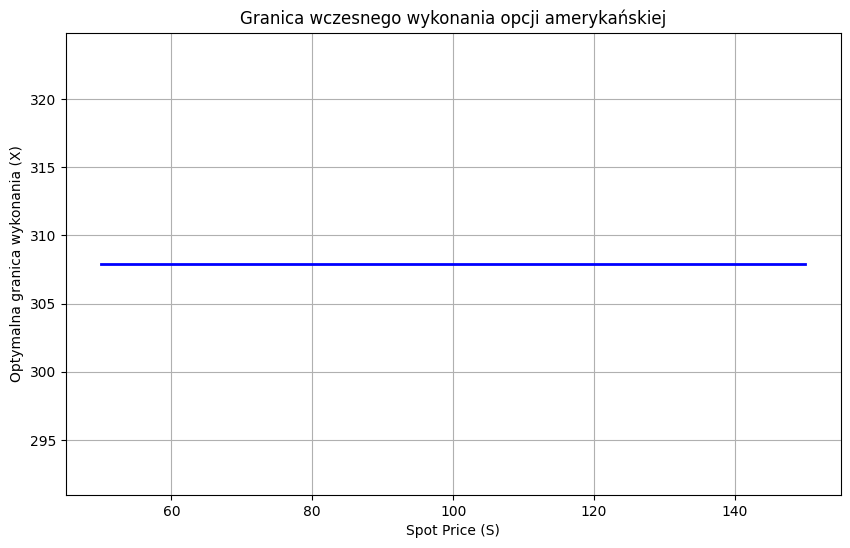

In [9]:
import matplotlib.pyplot as plt

def plot_early_exercise_boundary(model, spot_range=np.linspace(50, 150, 100)):
    """
    Pokazuje optymalną granicę wykonania w funkcji ceny spot
    
    Parameters:
        model : BjerksundStensland1993
            Instancja modelu
        spot_range : array
            Zakres cen instrumentu bazowego
    """
    boundaries = []
    for S in spot_range:
        model.spot_price = S  # Tymczasowa zmiana ceny
        beta = model._calculate_beta()
        boundaries.append(model._calculate_flat_exercise_boundary(beta))
    
    plt.figure(figsize=(10, 6))
    plt.plot(spot_range, boundaries, 'b-', lw=2)
    plt.xlabel('Spot Price (S)')
    plt.ylabel('Optymalna granica wykonania (X)')
    plt.title('Granica wczesnego wykonania opcji amerykańskiej')
    plt.grid(True)
    plt.show()

# Przykład użycia:
model = BjerksundStensland1993(spot_price=100, strike_price=95, time_to_maturity=1.0,
                              risk_free_rate=0.05, cost_of_carry=0.03, volatility=0.2)
plot_early_exercise_boundary(model)

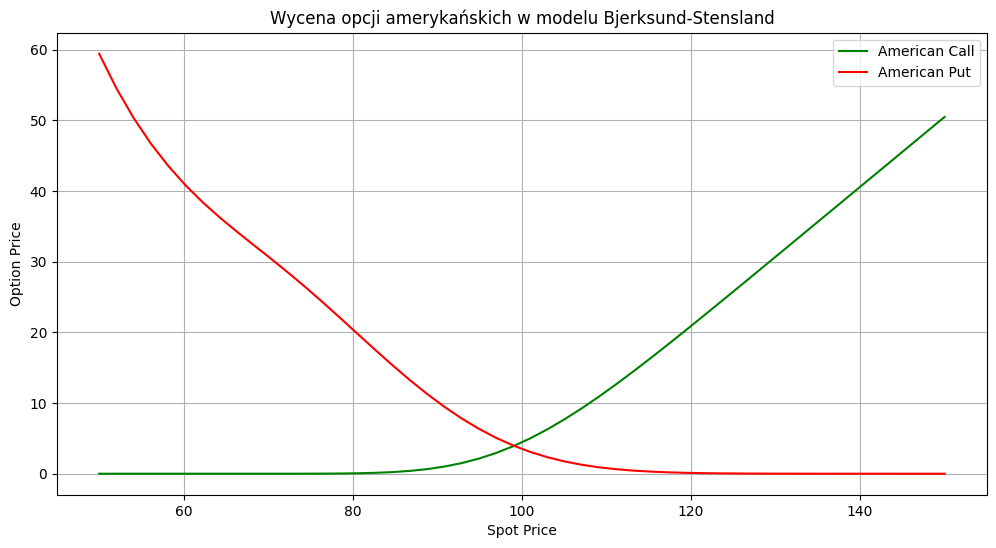

In [11]:
def plot_prices_vs_spot(model, spot_range=np.linspace(50, 150, 50)):
    call_prices = []
    put_prices = []
    
    for S in spot_range:
        model.spot_price = S
        call_prices.append(model.calculate_call_price())
        put_prices.append(model.calculate_put_price())
    
    plt.figure(figsize=(12, 6))
    plt.plot(spot_range, call_prices, 'g-', label='American Call')
    plt.plot(spot_range, put_prices, 'r-', label='American Put')
    plt.xlabel('Spot Price')
    plt.ylabel('Option Price')
    plt.title('Wycena opcji amerykańskich w modelu Bjerksund-Stensland')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_prices_vs_spot(bs_model)

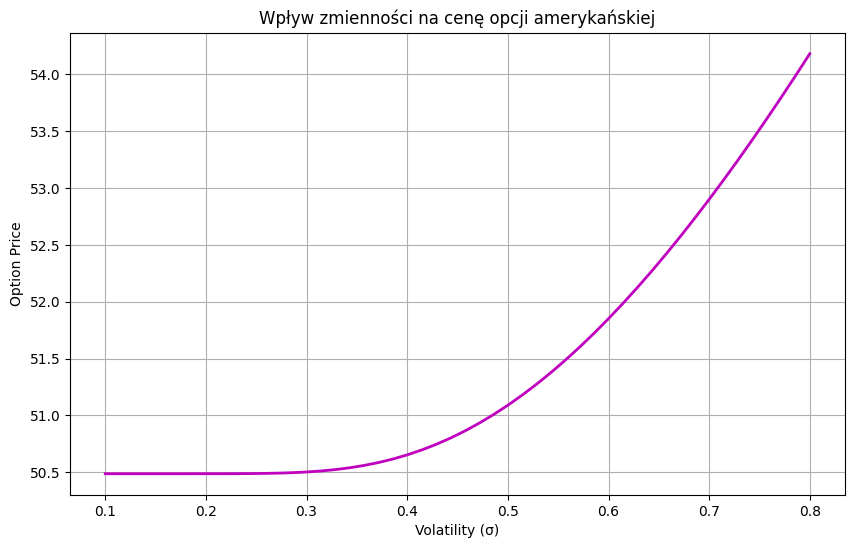

In [13]:
def plot_volatility_impact(model, volatilities=np.linspace(0.1, 0.8, 50)):
    prices = []
    
    for vol in volatilities:
        model.volatility = vol
        prices.append(model.calculate_call_price())
    
    plt.figure(figsize=(10, 6))
    plt.plot(volatilities, prices, 'm-', lw=2)
    plt.xlabel('Volatility (σ)')
    plt.ylabel('Option Price')
    plt.title('Wpływ zmienności na cenę opcji amerykańskiej')
    plt.grid(True)
    plt.show()
plot_volatility_impact(bs_model)